# Fordgobike dataset exploration
## by Mohamed Momen

## Preliminary Wrangling

The ford Gobike dataset contains the trips data for April 2019 consists of duration by seconds, user type (customer - subscriber) , time of the trip and gegraphical location and 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
df = pd.read_csv('201904-fordgobike.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,No


In [8]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,239111.000000,239047.000000,239111.000000,239111.000000,239047.000000,239111.000000,239111.000000,239111.000000
mean,802.671199,141.836538,37.769536,-122.352503,140.838099,37.766996,-122.343420,3666.956493
std,1990.006091,116.289776,0.127698,0.277088,116.386168,0.343083,1.068144,2180.717333
min,61.000000,3.000000,0.000000,-122.453704,3.000000,0.000000,-122.453704,11.000000
25%,349.000000,47.000000,37.770083,-122.413004,44.000000,37.770407,-122.411738,1720.000000
50%,558.000000,104.000000,37.780760,-122.398285,102.000000,37.780955,-122.397437,3471.000000
75%,876.000000,240.000000,37.797280,-122.291209,239.000000,37.797320,-122.291376,5749.000000
max,86114.000000,420.000000,37.880222,0.000000,420.000000,37.880222,0.000000,7108.000000


dataset contains 239111 records and the mean duration is 802 seconds with minimum and maximum 60 and 86114 seconds respectivly

I will add more columns to suport investigation on time and geographically variables

In [4]:
df['start_hour'] = pd.to_datetime(df.start_time).dt.hour
df['distance'] = np.sqrt((df['start_station_latitude']-df['end_station_latitude'])**2
                        +(df['start_station_longitude']-df['end_station_longitude'])**2)
df['day_week'] = pd.to_datetime(df.start_time).dt.day_name()
print (df)
print (df.dtypes)

        duration_sec                start_time                  end_time  \
0              50305  2019-04-30 22:33:55.1550  2019-05-01 12:32:20.4540   
1              53725  2019-04-30 20:43:41.6320  2019-05-01 11:39:06.9170   
2              78072  2019-04-30 10:32:46.4890  2019-05-01 08:13:58.9750   
3              78969  2019-04-30 10:00:51.5500  2019-05-01 07:57:01.2620   
4               1128  2019-04-30 23:59:04.7390  2019-05-01 00:17:53.0910   
...              ...                       ...                       ...   
239106           184  2019-04-01 00:09:17.5660  2019-04-01 00:12:22.5170   
239107           539  2019-04-01 00:03:02.5730  2019-04-01 00:12:02.0670   
239108           292  2019-04-01 00:06:04.2370  2019-04-01 00:10:56.9850   
239109           471  2019-04-01 00:01:38.4110  2019-04-01 00:09:29.9650   
239110           356  2019-04-01 00:00:28.7290  2019-04-01 00:06:25.0650   

        start_station_id                                 start_station_name  \
0       

In [4]:
print(df.shape)
print(df.dtypes)
print(df.head(10))

(239111, 14)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         50305  2019-04-30 22:33:55.1550  2019-05-01 12:32:20.4540   
1         53725  2019-04-30 20:43:41.6320  2019-05-01 11:39:06.9170   
2         78072  2019-04-30 10:32:46.4890  2019-05-01 08:13:58.9750   
3         78969  2019-04-30 10:00:51.5500  2019-05-01 07:57:01.2620   
4          1128  2019-04-30 23:59:04.7390  2019-05-01 00:17:53.0910   
5          1388  2019-04-30 23:53:05.9820  2019-05-01 00:

### What is the structure of your dataset?

the dataset consists of 239111 records of start and end time and the start and end location user type 

### What is/are the main feature(s) of interest in your dataset?

The main feature of interest in this data sets is the duration in minutes because time equals money and number of trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the user type, time (start time and date with the end time and date ) and the location will have effects on the trip number and trip duration.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

I'll start by looking at the distribution of the main variable of interest: duration in seconds.

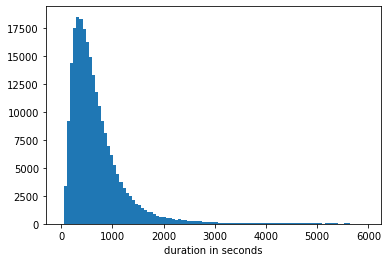

In [5]:
binsize = 60
bins = np.arange(0, 6000, binsize)
plt.hist(data=df, x='duration_sec', bins = bins);
plt.xlabel('duration in seconds')
plt.show()

The duration in seconds has wide range of values (so I use duration in minutes instead) the values have concentration between 0 and 2000 seconds 

# The variables that expected to have effects on duration 
> 1- I will see the distrbution of trips from the user type point of view

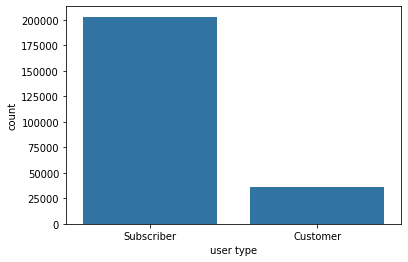

In [7]:
base_color = sb.color_palette()[0]
sb.countplot(data= df, x= 'user_type', color=base_color)
plt.xlabel('user type')
plt.show()

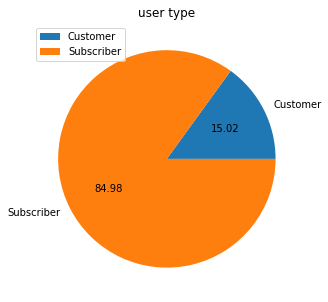

In [27]:
fig = df.user_type.groupby(df.user_type).count().plot(kind='pie', autopct='%.2f',  title='user type', figsize=(5,5));
plt.ylabel('');
plt.legend(loc="upper left");

on average the Subscriber user make more trips than the customer user about 85% of the trips made by subscriper user

2- lets see the gegraphical locations of the trips (start station and end location and the distance)

a- the top 20 end station by number of bikes added

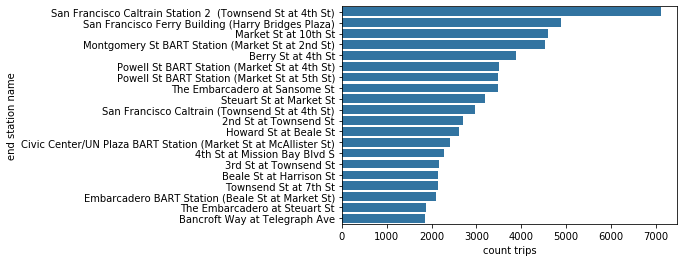

In [21]:
#end_station_name
station_order = df['end_station_name'].value_counts()[:20].index
base_color = sb.color_palette()[0]
sb.countplot(data= df, y= 'end_station_name', color=base_color, order= station_order)
plt.ylabel('end station name')
plt.xlabel('count trips')
plt.show()

b- The top 20 start station by number of bikes taken

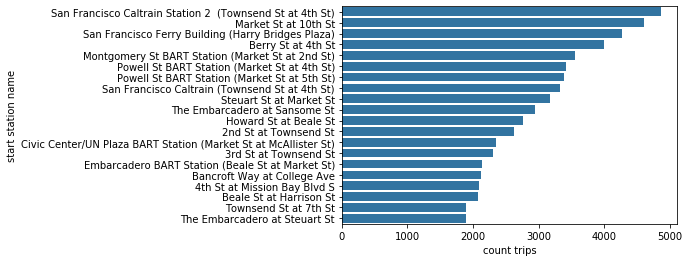

In [22]:
#start_station_name
station_order = df['start_station_name'].value_counts()[:20].index
base_color = sb.color_palette()[0]
sb.countplot(data= df, y= 'start_station_name', color=base_color, order= station_order)
plt.ylabel('start station name')
plt.xlabel('count trips')
plt.show()

we note the large difference between this values and the previous values for example San Francisco Caltrain Station 2 (end for 7000 trip and start for 5000 station)

3- Let's move to the other variable which is time of the trip (day of the week and hour othe day)
> a- the ditrbution of number of trips per days of the week

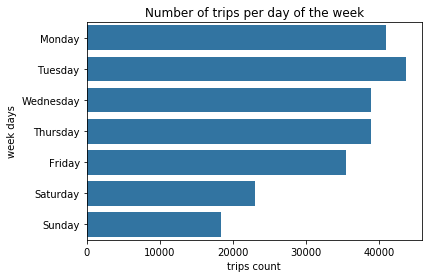

In [20]:
#trips per week day 
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
base_color = sb.color_palette()[0]
sb.countplot(data= df, y= 'day_week', color=base_color, order= days_order)
plt.ylabel('week days')
plt.xlabel('trips count')
plt.title('Number of trips per day of the week')
plt.show()

The trips count in weekends is less than weekdays as we expected

b- The ditrbution of average trip count on hours of the day

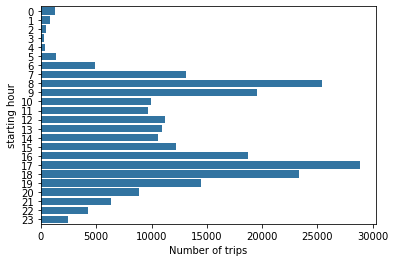

In [26]:
#trips per start hour
base_color = sb.color_palette()[0]
sb.countplot(data= df, y= 'start_hour', color=base_color)
plt.xlabel('Number of trips')
plt.ylabel('starting hour')
plt.show()

we notice there are two peek times on the day one at 8:00 and the other at 17:00

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The duration in seconds has wide range of values and the values have concentration between 0 and 2000 seconds 
- on average the Subscriber user make more trips than the customer user about 85% of the trips made by subscriper user
- The trips count in weekends is less than weekdays as we expected
- There are two peeks on the day one at 8:00 and the other at 17:00

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Although this is out of our scope but we notice that there is big differences between the number of taken bikes and added bikes for example station San Fransisco Caltrain station 2 the added bikes is almost 7000 bikes and taken around 5000 bikes with 2000 bikes in difference

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Let's see the relation between duration of the trip and the starting hours

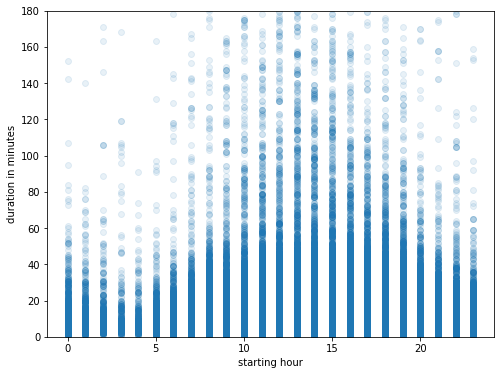

In [11]:
# scatter plot of duration in minutes vs. starting hour
df['duration_minutes'] = df['duration_sec']//60
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'start_hour', y = 'duration_minutes', alpha = 1/10)
#plt.xlim([0, 3.5])
plt.xlabel('starting hour')
plt.ylim([0, 180])
plt.ylabel('duration in minutes')
plt.show()

the long duration rents starts between 11:00 and 15:00

Let's see the relation between ecludian distance of traveled and the starting hours

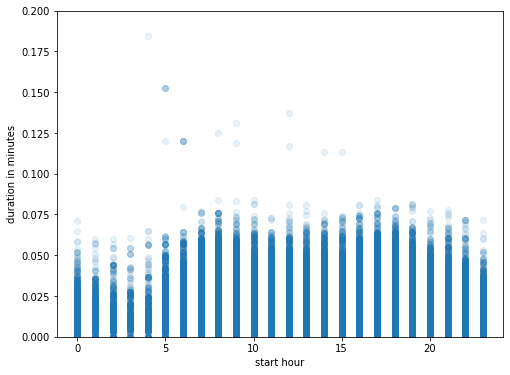

In [7]:
# scatter plot of duration in minutes vs. start hour
df['duration_minutes'] = df['duration_sec']//60
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'start_hour', y = 'distance', alpha = 1/10)
plt.ylim([0, 0.2])
plt.xlabel('start hour')
plt.ylabel('duration in minutes')
plt.show()

The duration in minutes decreases from 1:00 to 4:00 on average day

Is there a difference of the average speed each day (traffic)

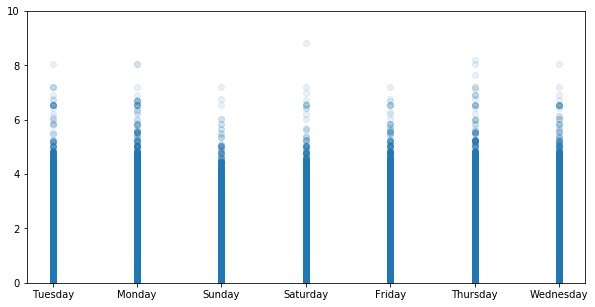

In [9]:
#calculate the average speed by combute the ecludian distanse over the time in minutes
df['traffic'] =(np.sqrt((df['start_station_latitude']-df['end_station_latitude'])**2
                        +(df['start_station_longitude']-df['end_station_longitude'])**2)
                / (df['duration_minutes']))*1000
plt.figure(figsize = [10, 5])
plt.ylim([0, 10])
plt.scatter(data = df, x = 'day_week', y = 'traffic', alpha = 1/10);

on average the return bike speed decreases on weekends and tuesdays (may be they are tired :D)

Let us see the Relation between the duration in minutes and the days of the week

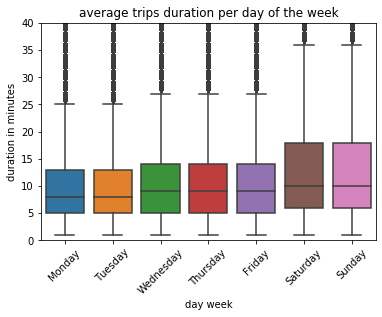

In [12]:
# scatter plot of duration in minutes vs. start hour
days_order =  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.boxplot(data = df, x = 'day_week', y = 'duration_minutes', order=days_order)
plt.ylim([0, 40])
plt.xlabel('day week')
plt.ylabel('duration in minutes')
plt.title('average trips duration per day of the week')
plt.xticks(rotation=45)
plt.show();

on average the rent duration in minutes increases in weekends

Is there relation between user type , days of the week and the duration of the trip in minutes

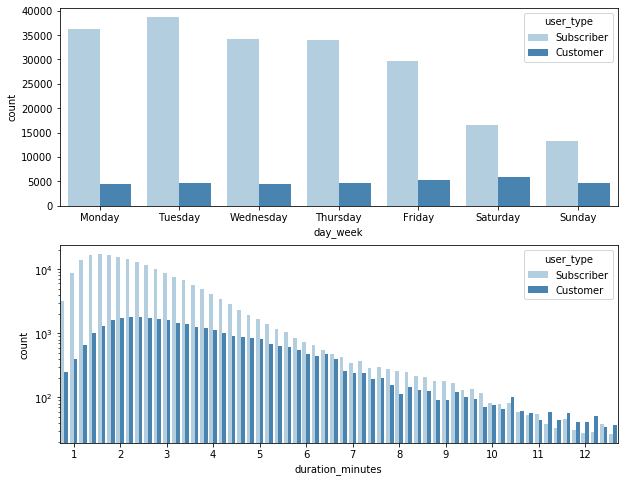

In [14]:
# we will invistigate the relation between user type , days of the week and the duration of the trip in minutes
plt.figure(figsize = [10, 8])
df2 = df.query('duration_minutes <= 60')
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


# subplot 1: days of the week vs user type
plt.subplot(2, 1, 1)
sb.countplot(data = df2, x = 'day_week', hue = 'user_type', palette = 'Blues', order= days_order)

# subplot 2: duration in minutes vs. user type
ax = plt.subplot(2, 1, 2)
g= sb.countplot(data = df2, x = 'duration_minutes', hue = 'user_type', palette = 'Blues')
plt.xticks(np.arange(min(df2['duration_minutes']), max(df2['duration_minutes'])+1, 5.0))
g.set_yscale('log')

plt.show()

the subscriber users rent less number of bikes in weekends than weekdays (Although the customers users are vise versa)
and the customers users rent more bikes than subscribers for long periods

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- On average the subscriper users rent bikes for shorter time duration than the customer user and There is a strong relation between duration in minutes and days of the week
- Although the number of trips decreases in weekends the average time of the trip increases.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

the company should consider the difference between the number of the bikes taken and added per each station.

## Multivariate Exploration

we will investigate more the relation between the duration of the trip with the other variables

Let's start with realtion between starting hour and the duration in minutes each day of the week per user type

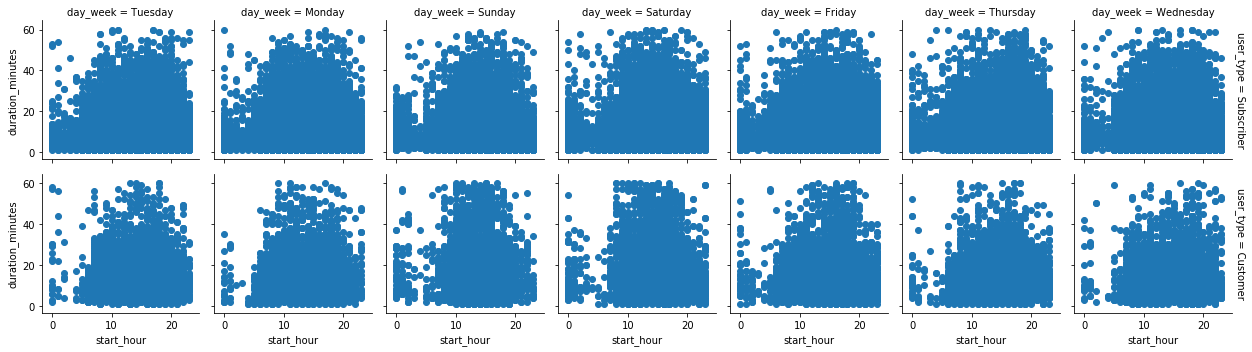

In [112]:
#the realtion among the days of the week, the starting hour and the user type
g = sb.FacetGrid(data = df2, col = 'day_week', row = 'user_type', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'start_hour', 'duration_minutes');

on early hours of the day customers rent less bikes specially weekdays (not on weekends)

Let us move on to see the relation between duration in minutes, the ecludian distance and the starting hour

Text(0, 0.5, 'average ecludian distance')

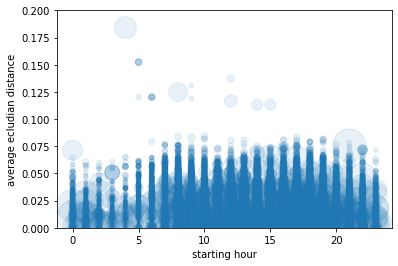

In [28]:
plt.scatter(data = df, x = 'start_hour', y = 'distance', s = 'duration_minutes', alpha=0.1);
plt.ylim([0, 0.2])
plt.xlabel('starting hour')
plt.ylabel('average ecludian distance')

As expected on early hours the trips become shorter and bikes moves less distance

In [16]:
#function to draw facetgrid
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                 include_lowest = True)
    means = y.groupby(data_bins).mean()
    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

So, there differences between customer and subscriber users in bikes using pattern?

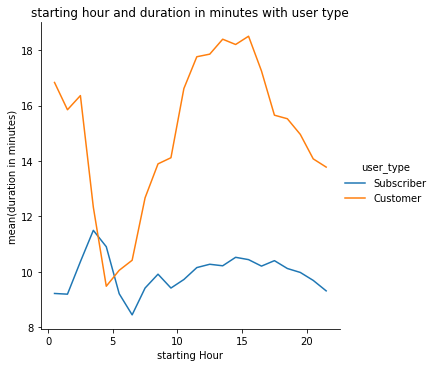

In [19]:
#the relation between average duration in minutes and user type and starting hour 
bin_edges = np.arange(0, df2['start_hour'].max(), 1)
g = sb.FacetGrid(data = df2, hue = 'user_type', size = 5)
g.map(mean_poly, "start_hour", "duration_minutes", bins = bin_edges)
g.set_ylabels('mean(duration in minutes)')
g.set_xlabels('starting Hour');
plt.title('starting hour and duration in minutes with user type');
g.add_legend()

Interestinglly, the customer users rent the bikes for longer average duration except starting hours from 4:00 to 6:00

Finally, Let us see if there is difference between average duration in minutes and starting hour from weekends to weekdays 

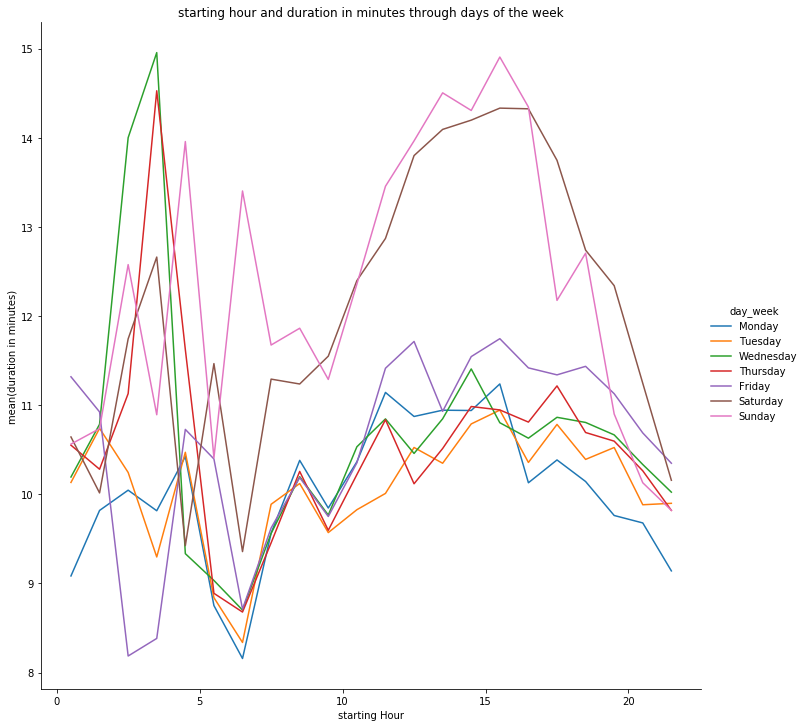

In [17]:
#the relation between average duration in minutes and days of the week and starting hour 
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bin_edges = np.arange(0, df2['start_hour'].max(), 1)
g = sb.FacetGrid(data = df2, hue = 'day_week', size = 10, hue_order= days_order)
g.map(mean_poly, "start_hour", "duration_minutes", bins = bin_edges)
g.set_ylabels('mean(duration in minutes)');
g.set_xlabels('starting Hour');
plt.title('starting hour and duration in minutes through days of the week');
g.add_legend()

wow, the longer duration rents happens on weekends between 10:00 and 20:00

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Each user type has different patterns of starting time esspecially in priod from 04:00 to 06:00 also the distance between start and end station are minimum in the same period and even the days of the week pattern are different in this period.
- the customer users rent the bikes for longer average duration except starting hours from 4:00 to 6:00.
- the longer duration rents happens on weekends between 10:00 and 20:00.

### Were there any interesting or surprising interactions between features?

there is relation among days of the week, the start time and the duration of the trip (I noted that in the weekends (Sundays and Saturdays) average duration in minutes increses from 10:00 till 18:00 over the other days in the same period of time)

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!